In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import plotly.graph_objects as go
import plotly.figure_factory as ff
from termcolor import colored

warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

In [20]:
sleep_data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
sleep_data['Sleep Disorder'] = sleep_data['Sleep Disorder'].fillna('None')
sleep_data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


**Dataset Information:**

Person ID: An identifier for each individual.

Gender: The gender of the person (Male/Female).

Age: The age of the person in years.

Occupation: The occupation or profession of the person.

Sleep Duration (hours): The number of hours the person sleeps per day.

Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.

Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.

Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).

Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

Heart Rate (bpm): The resting heart rate of the person in beats per minute.

Daily Steps: The number of steps the person takes per day.

Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

In [21]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [23]:
sleep_data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [24]:
#for statistical info
sleep_data.describe().style.background_gradient(cmap='Blues')

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [26]:
#for statistical info including string values
sleep_data.describe(include='O').style.set_properties(**{'background-color': "#3790A7", 'color': '#E2EEF3'})

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,3
top,Male,Nurse,Normal,130/85,None
freq,189,73,195,99,219


In [32]:
classes=(sleep_data['Sleep Disorder'].unique(),None)
print('The outputs from the classification are :',classes)
sleep_data['Sleep Disorder'].value_counts()

The outputs from the classification are : (array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object), None)


Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [38]:

fig = px.histogram(sleep_data, x='Sleep Disorder', 
                   barmode="group", color='Sleep Disorder',
                   color_discrete_sequence=['white', "#15927D", "#93D6CB"],
                   text_auto=True)

fig.update_layout(title='<b>Distribution of People with Sleep Disorders<b>',
                  title_font={'size': 25},
                  title_x=0.5,
                  paper_bgcolor="#DEF0EB",
                  plot_bgcolor="#DEF0EA",
                  showlegend=True)

fig.update_yaxes(showgrid=True)
fig.show()

In [31]:
Gender=sleep_data['Gender'].unique(),None
print('The values of Sex column are :',Gender)
sleep_data.groupby('Sleep Disorder')['Gender'].value_counts()

The values of Sex column are : (array(['Male', 'Female'], dtype=object), None)


Sleep Disorder  Gender
Insomnia        Male       41
                Female     36
None            Male      137
                Female     82
Sleep Apnea     Female     67
                Male       11
Name: count, dtype: int64

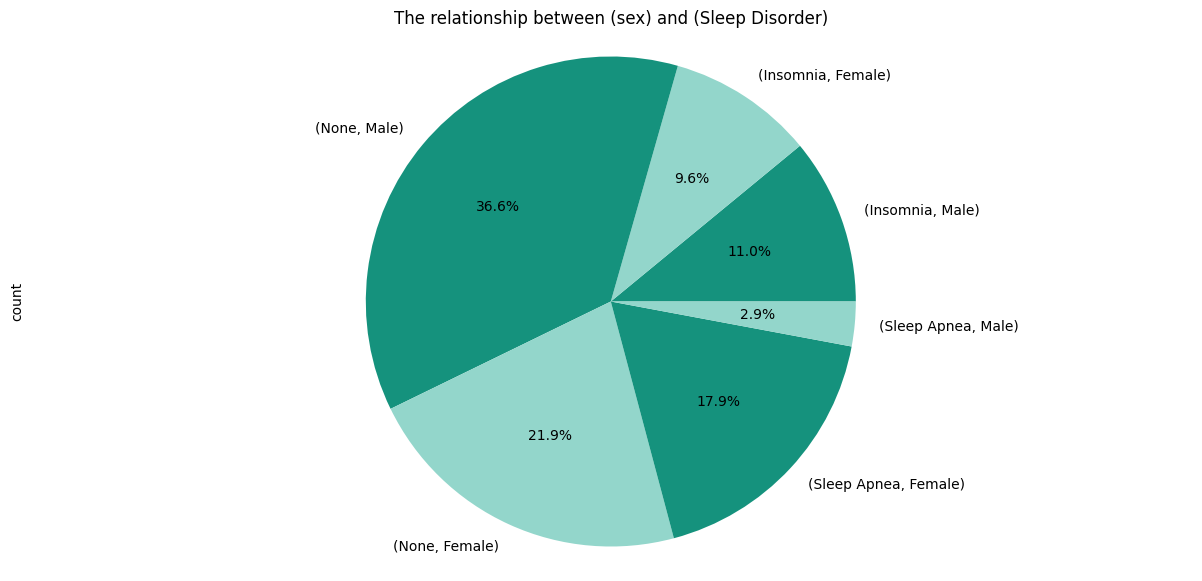

In [48]:
sleep_data.groupby('Sleep Disorder')['Gender'].value_counts().plot.pie(autopct ='%1.1f%%',figsize=(15,7),
                                                                       colors=["#15927D","#93D6CB",'#15927D','#93D6CB','#15927D','#93D6CB'])
plt.title('The relationship between (sex) and (Sleep Disorder)')
plt.axis('equal')
plt.show()

In [45]:
jobs=sleep_data['Occupation'].unique(),None
print('The types of jobs in the dataset are:',jobs)

The types of jobs in the dataset are: (array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object), None)


In [46]:
sleep_data.groupby('Sleep Disorder')['Occupation'].value_counts()

Sleep Disorder  Occupation          
Insomnia        Salesperson             29
                Teacher                 27
                Accountant               7
                Engineer                 5
                Doctor                   3
                Nurse                    3
                Lawyer                   2
                Software Engineer        1
None            Doctor                  64
                Engineer                57
                Lawyer                  42
                Accountant              30
                Nurse                    9
                Teacher                  9
                Software Engineer        3
                Salesperson              2
                Scientist                2
                Manager                  1
Sleep Apnea     Nurse                   61
                Doctor                   4
                Teacher                  4
                Lawyer                   3
                S

In [44]:
occ_sleep = sleep_data.groupby(['Occupation', 'Sleep Disorder']).size().reset_index(name='Count')

fig = px.bar(occ_sleep, 
             x='Occupation', 
             y='Count', 
             color='Sleep Disorder',
             title='<b>Sleep Disorders by Occupation</b>',
             barmode='group',
             color_discrete_map={'None': 'white', 'Insomnia': '#15927D', 'Sleep Apnea': '#93D6CB'})

fig.update_layout(paper_bgcolor="#DEF0EB", plot_bgcolor="#DEF0EA", title_x=0.5)
fig.show()